<a href="https://colab.research.google.com/github/100rab-S/House-Price-Prediction/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA

## Import modules and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)  # to display all rows and columns while printing.
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)

plt.style.use("dark_background") # to change the default values of plt to our interest.
params = {'legend.fontsize': '15',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams['figure.figsize'] = 24, 14

plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

#plt.rcParams.keys() can be used to see all the parameters related to a plot.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


missingno functions:
msno.matrix(data), 
msno.bar(data), 
msno.heatmap(data), 

In [ ]:
# import pandas_profiling   to have a overview of data like EDA. there is some error dont know.
# pandas_profiling.ProfileReport(test)

In [2]:
train = pd.read_csv('/content/drive/My Drive/Kaggle/House price prediction using advanced regression/Data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Kaggle/House price prediction using advanced regression/Data/test.csv')

In [3]:
print(f'train size: {train.shape}, test size: {test.shape}')

train size: (1460, 81), test size: (1459, 80)


## SweetViz

In [ ]:
# !pip install sweetviz

In [ ]:
# import sweetviz as sw 

In [ ]:
# my_report = sw.compare([train, "Train"], [test, "Test"], "SalePrice")

:FEATURES DONE:                    |█████████████████████| [100%]   00:51  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)


Creating Associations graph... DONE!


To display the report, first download the report and
then later open it in a browser.

## Beginnig operation.

In [4]:
def lower_case_column_names(df): # function to lowercase column names.
  df.columns = df.columns.str.lower()
  return df

train = lower_case_column_names(train)
test = lower_case_column_names(test)

In [5]:
def lower_case_column_values(df): # function to lowercase dataframe values.
    #df = df.apply(lambda x : x.astype(str).str.lower())
    df = df.applymap(lambda x : x.lower() if type(x) == str else x)
    return df

train = lower_case_column_values(train)
test = lower_case_column_values(test)

## Imputing missing values.

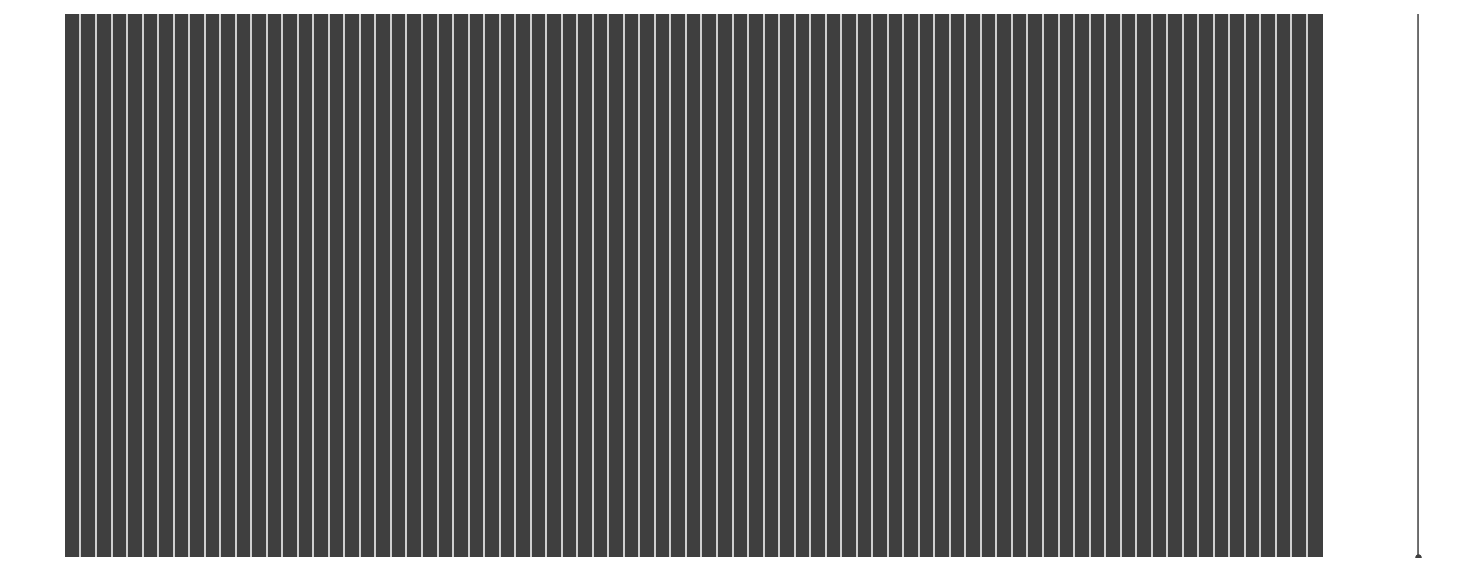

In [15]:
msno.matrix(train)

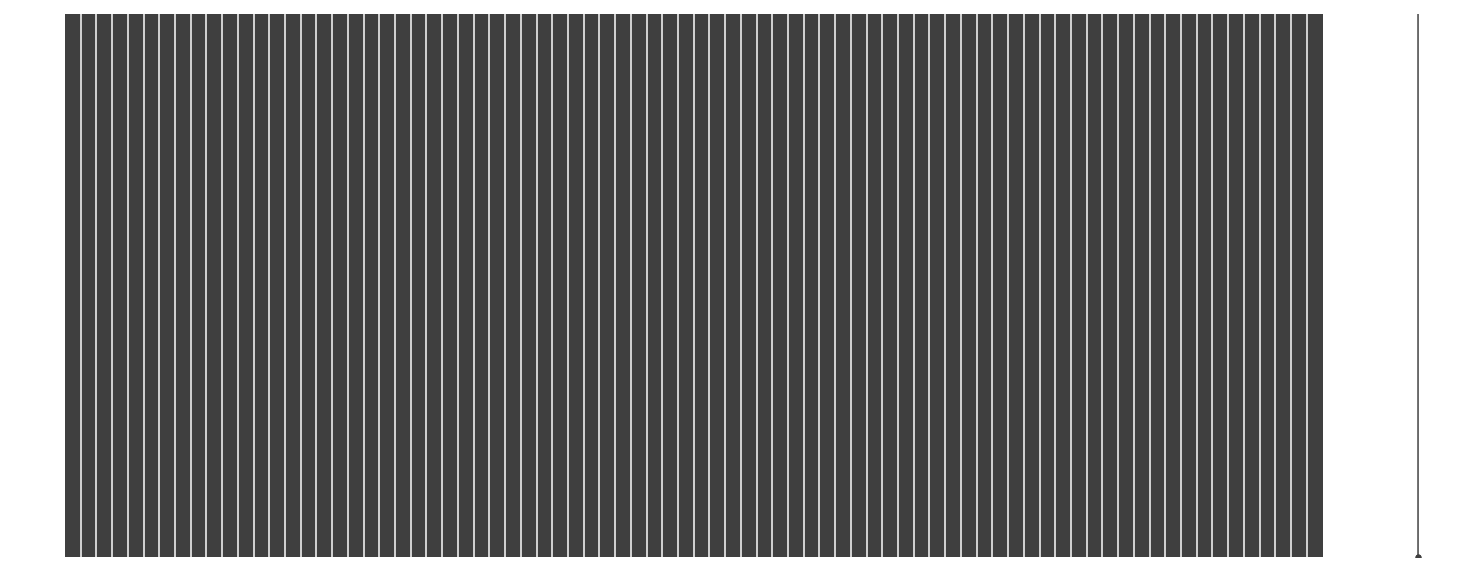

In [16]:
msno.matrix(test)

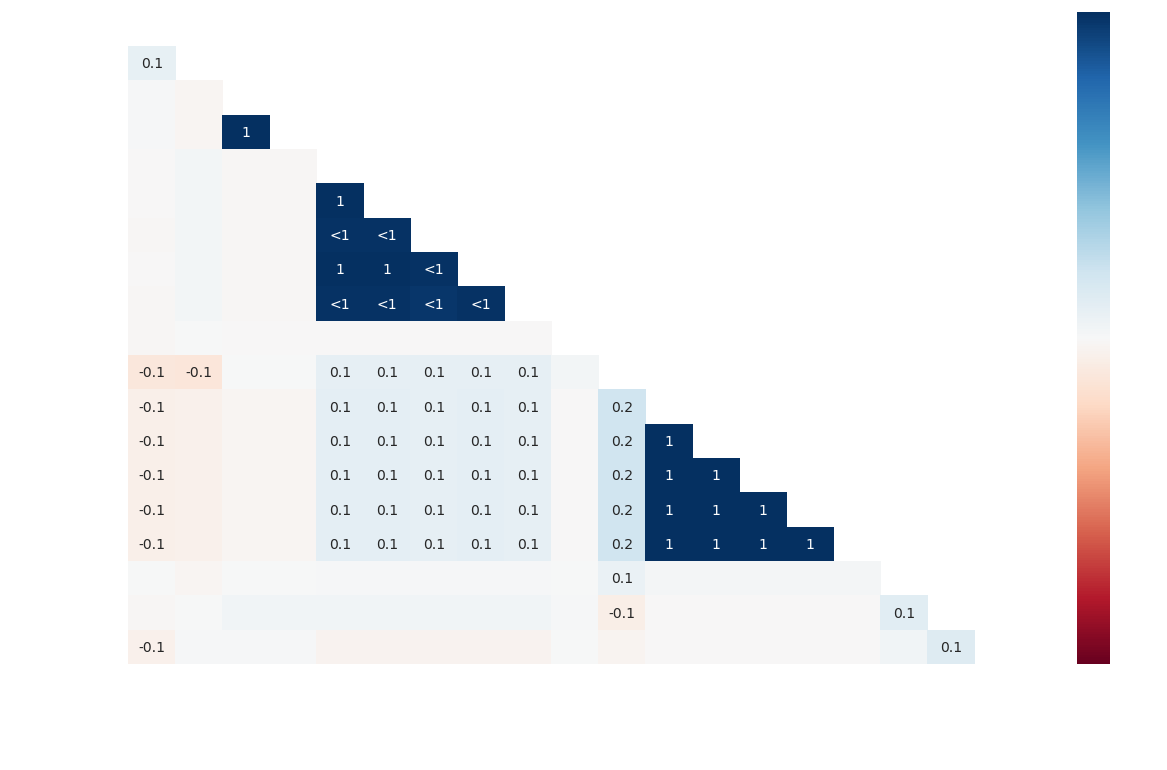

In [8]:
msno.heatmap(train)

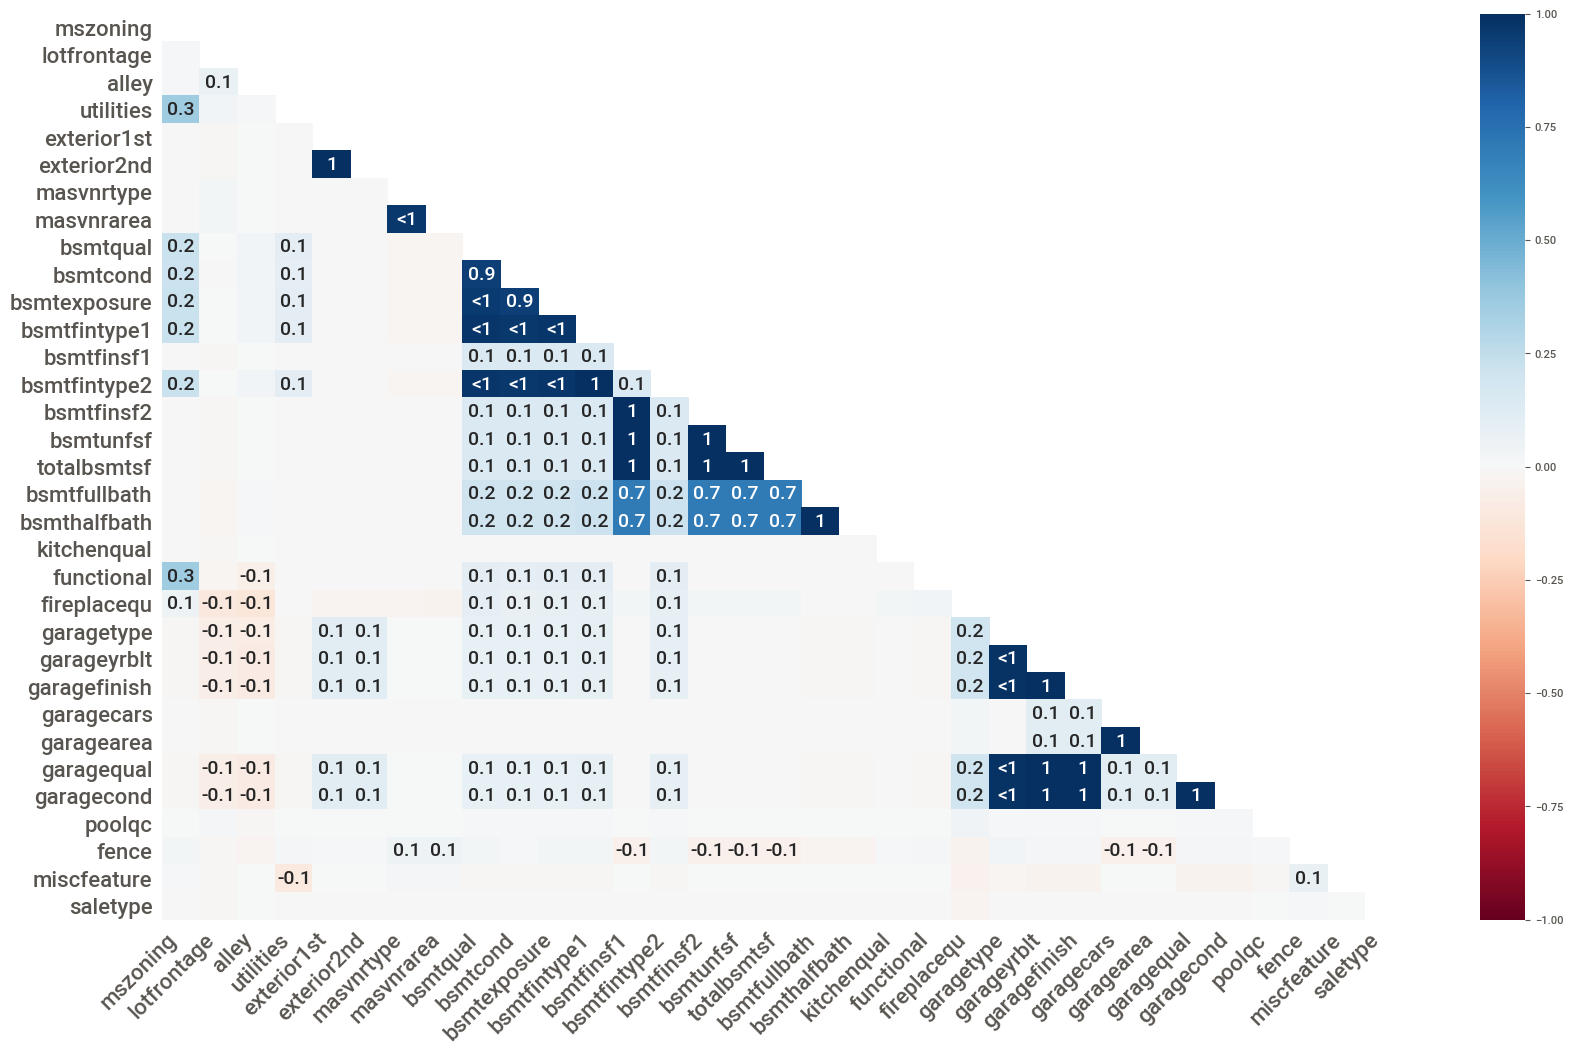

In [ ]:
msno.heatmap(test)

In [11]:
train[train['electrical'].isnull()] # rare case of having a null value and it is only one so dropped.
train = train.dropna(axis = 0, subset = ['electrical'])

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [12]:
def fillnull(df, cols): # it fills nun values with 'nothing'. It is not replacement.
  df[cols] = df[cols].fillna('nothing')

  return df

cols_with_null = ['alley', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 
                  'bsmtfintype2', 'miscfeature', 'fence', 'masvnrtype',
                  'masvnrarea', 'fireplacequ', 'garagetype', 'garageyrblt',
                  'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'lotfrontage',
                  'utilities', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf']


train = fillnull(train, cols_with_null)
test = fillnull(test, cols_with_null)

test[['exterior1st', 'exterior2nd']] = test[['exterior1st', 'exterior2nd']].fillna('other')
test[['bsmtfullbath', 'bsmthalfbath', 'garagecars', 'garagearea']] = test[['bsmtfullbath',
                                                                           'bsmthalfbath',
                                                                           'garagecars', 'garagearea']].fillna(0)
test['kitchenqual'] = test['kitchenqual'].fillna('TA')
test['functional'] = test['functional'].fillna('Typ')
test['saletype'] = test['saletype'].fillna('WD')

mode = test['mszoning'].mode()
#print(mode) mode is RL
test['mszoning'] = test['mszoning'].fillna('RL')
print('All missing values filled!')

All missing values filled!


In [13]:
trainNull = train[train.isnull().any(axis = 1)] # no missing values in train set.
trainNull

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [14]:
test[test.isnull().any(axis=1)] # no missing values in test set.

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition


# EDA

In [24]:
def removeId(df): # function to remove 'id' column since it is unique in every row.
    df = df.drop('id', axis = 1)

    return df

train = removeId(train)
test = removeId(test)

In [26]:
catcol = ['mssubclass', 'mszoning', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
          'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
          'overallqual', 'overallcond', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
          'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
          'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'electrical', 'bsmtfullbath',
          'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
          'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garagefinish',
          'garagecars', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
          'saletype', 'salecondition']

nominalcol = ['mssubclass', 'street', 'alley', 'lotshape',
          'landcontour', 'lotconfig', 'landslope', 'neighborhood',
          'condition1', 'condition2', 'yearbuilt',
          'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st',
          'exterior2nd', 'masvnrtype', 'foundation', 'heating',
          'centralair', 'electrical', 'garagetype', 'garageyrblt', 'paveddrive',
          'miscfeature', 'saletype','salecondition', 'mosold']
                 
ordinalcol = ['mszoning', 'utilities', 'bldgtype', 'housestyle',
          'overallqual', 'overallcond', 'exterqual', 'extercond',
          'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
          'bsmtfintype2', 'heatingqc', 'kitchenqual', 'functional',
          'fireplacequ', 'garagefinish', 'garagequal', 'garagecond',
          'poolqc', 'fence', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
          'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
          'fireplaces', 'garagecars', 'yrsold']

numcol = ['lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf',
          'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'garagearea',
          'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
          'miscval', 'saleprice']

bincol = ['street', 'centralair']

time = ['yearbuilt', 'yearremodadd', 'garageyrblt', 'mosold', 'yrsold']

print(len(catcol) + len(numcol) + len(bincol) + len(time))

print(f'categorical: {len(catcol)}')
print(f'numerical: {len(numcol)}')
print(f'binary: {len(bincol)}')
print(f'Time: {len(time)}')

print("======================")
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

80
categorical: 53
numerical: 20
binary: 2
Time: 5
Train shape: (1459, 80)
Test shape: (1459, 79)


## Another way of dividing columns into cat and num.

In [ ]:
'''
catcolumn = []
numcolumn = []
bincolumn = []
for col in train.columns:
    if train[col].nunique() == 2:
        bincolumn.append(col)
    elif train[col].nunique() > 26:
        numcolumn.append(col)
    else:
        catcolumn.append(col)

print(f'categorical: {len(catcolumn)}')
print(f'numerical: {len(numcolumn)}')
print(f'binary: {len(bincolumn)}')
print('\n')



testcatcolumn = []
testnumcolumn = []
testbincolumn = []
for col in test.columns:
    if test[col].nunique() == 2:
        testbincolumn.append(col)
    elif test[col].nunique() > 26:
        testnumcolumn.append(col)
    else:
        testcatcolumn.append(col)

print(f'test-categorical: {len(testcatcolumn)}')
print(f'test-numerical: {len(testnumcolumn)}')
print(f'test-binary: {len(testbincolumn)}')
'''

## eda

In [ ]:
# for col in catcol: #to find distribution of classes in categorical column.
#     # print(col)
#     # print(test[col].value_counts())
#     # print('\n')

In [29]:
def replacement(df): #since none and no means that they don't consist that material.
    df['masvnrtype'] = df['masvnrtype'].replace('None','nothing')
    df['bsmtexposure'] = df['bsmtexposure'].replace('No', 'nothing')
    return df

train = replacement(train)
test = replacement(test)

In [30]:
def addcol(df): # new column consisting no of 'nothing' in each row/house
    x = df.T
    y = []
    for col in x.columns:
        z = x[col].str.count('nothing').sum()
        y.append(z)
    df['no_of_nothing'] = y
    return df

train = addcol(train)
test = addcol(test)

In [ ]:
def plot_all_columns_of_df(df, lst_of_cat_col):
    
    fig = plt.figure(figsize = (25, 15 * len(lst_of_cat_col)))

    axes = fig.subplots(len(lst_of_cat_col), 1)
    axes = axes.ravel()
    for ax, col in zip(axes, lst_of_cat_col):
        ax.hist(df[col])
        ax.set_title(col)
        plt.xticks(fontsize=14, rotation= 45)
        
    
plot_all_columns_of_df(test, catcol)

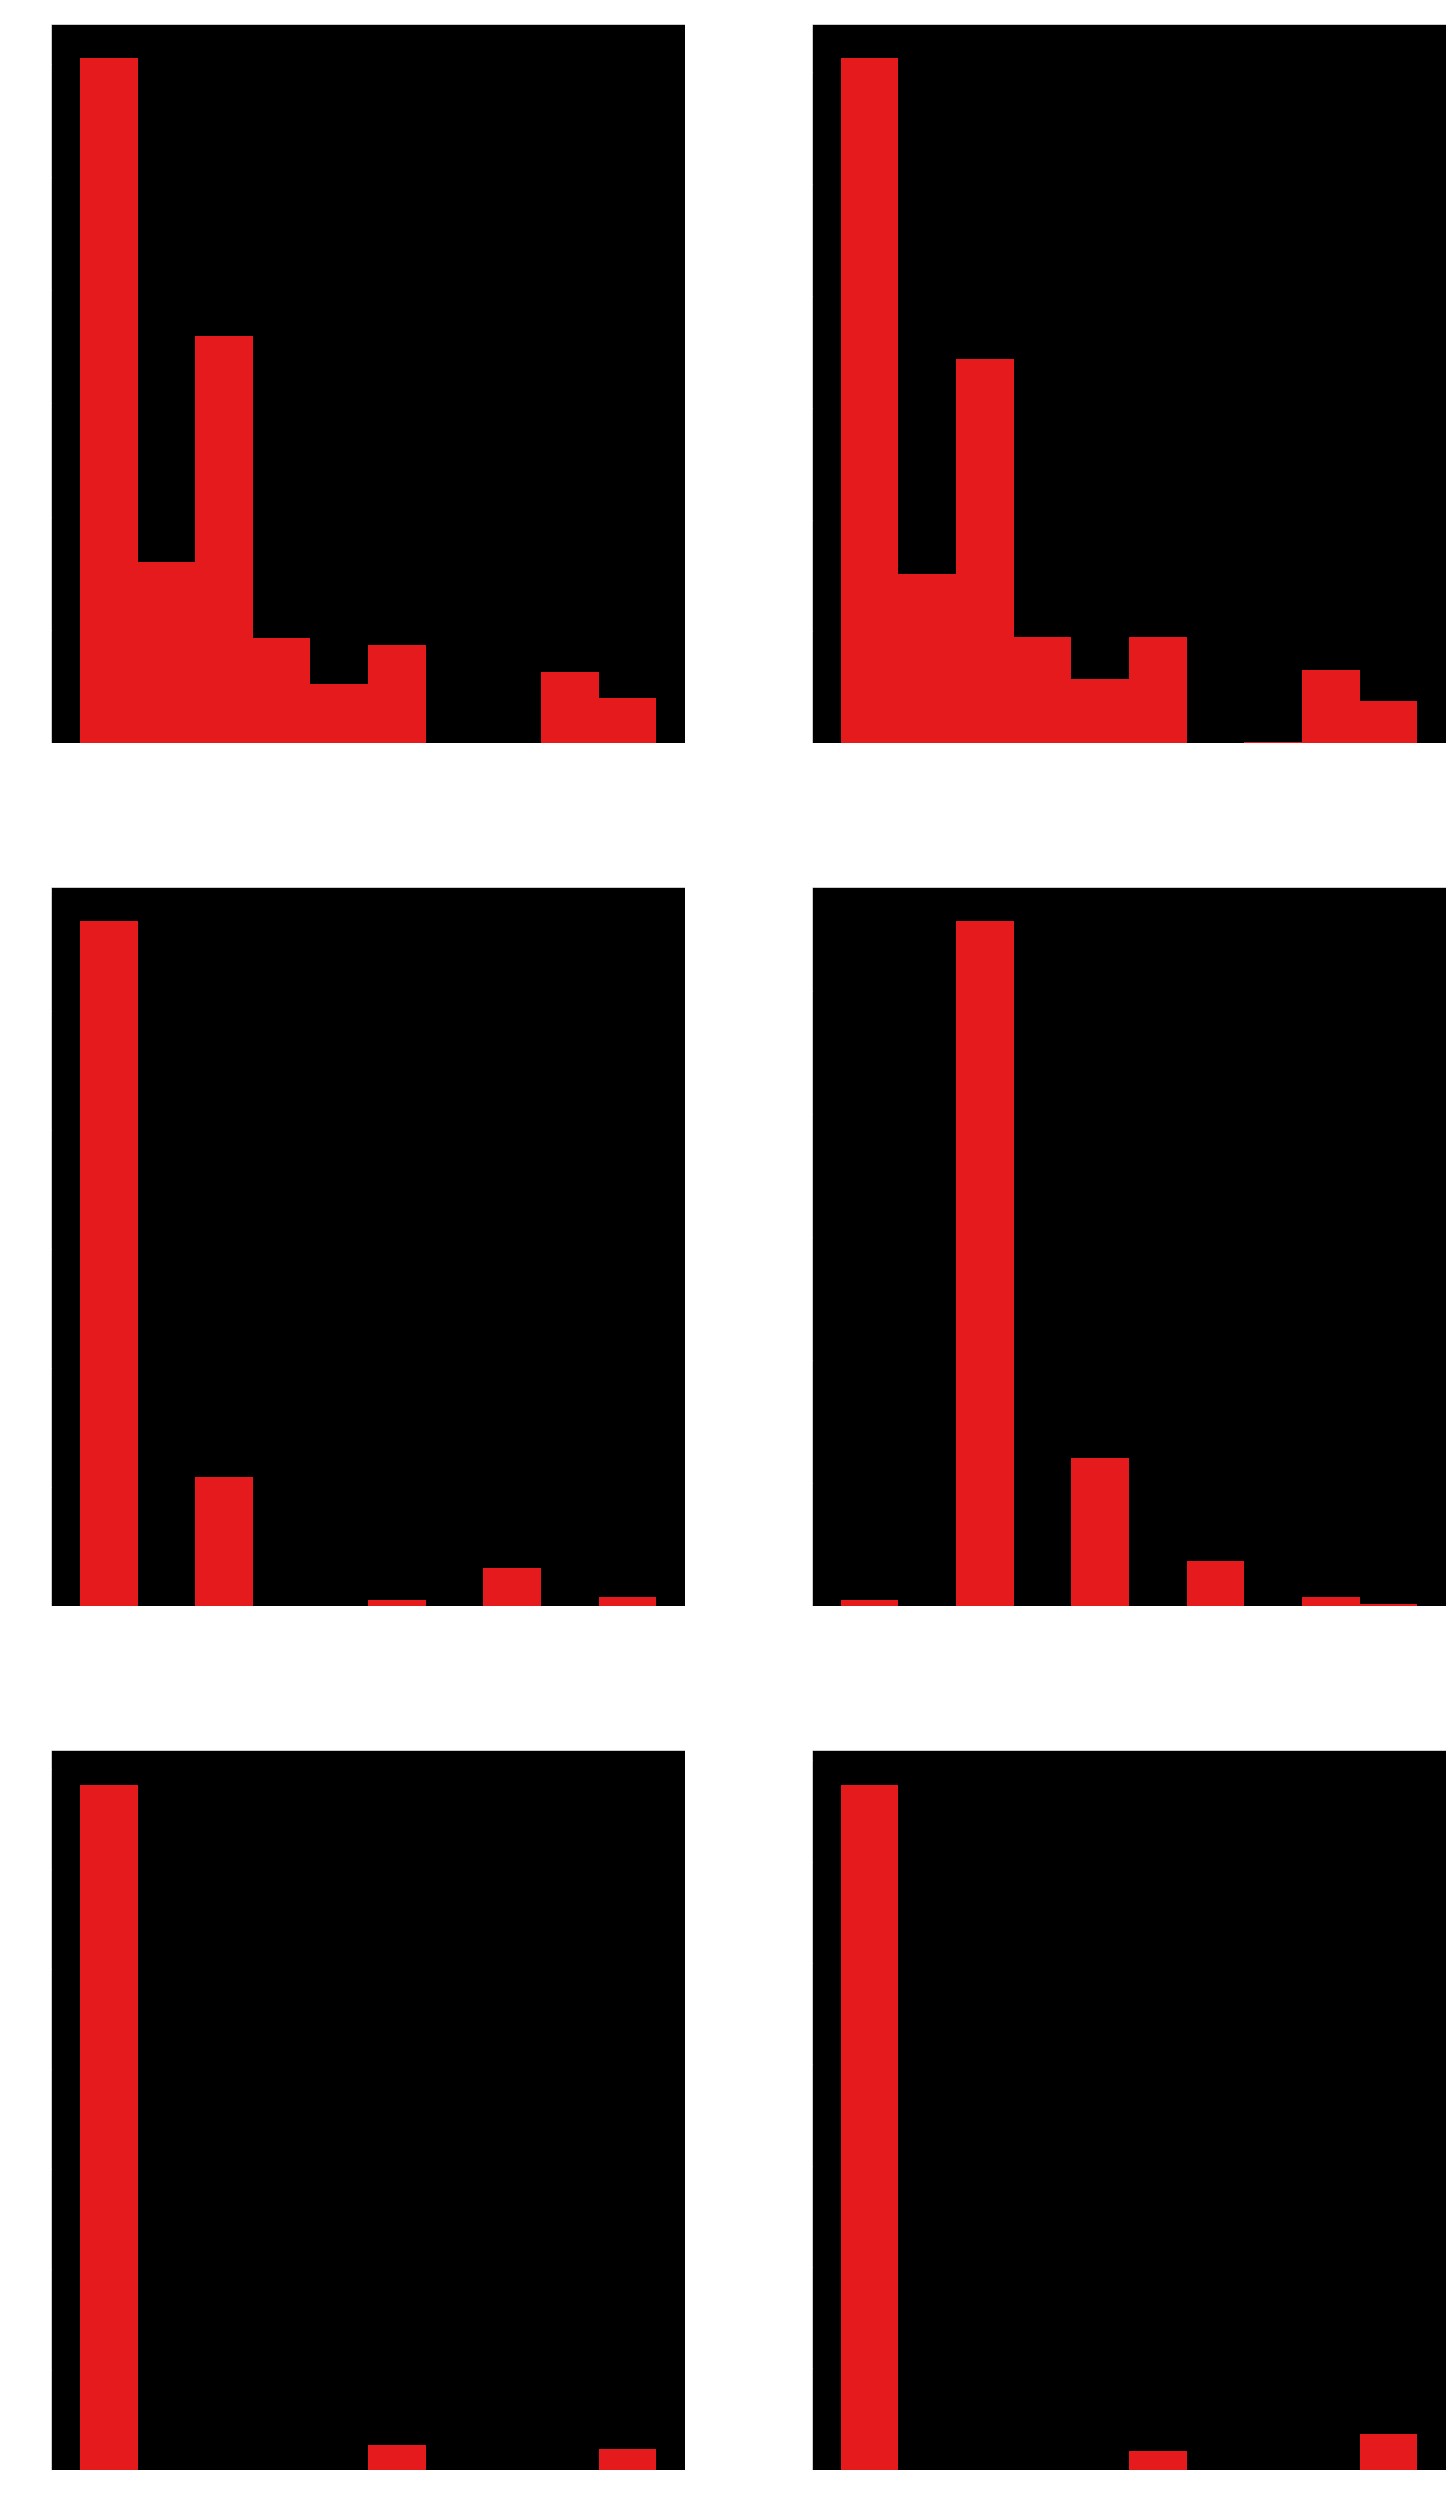

In [34]:
def plot_train_test_parallel(train, test, columns):
    figure = plt.figure(figsize = (25, 15 * len(columns)))
    axes = figure.subplots(len(columns), 2)
    for axes_row, col in zip(axes, columns):
        column = col
        for i, axes_col in enumerate(axes_row):
            if i % 2 == 0:
                axes_col.hist(train[column])
                axes_col.set_title(f'train:{column}')
            else:
                axes_col.hist(test[column])
                axes_col.set_title(f'test:{column}')


plot_train_test_parallel(train, test, catcol[:3])
#tomorrow work on sharex and sharey.

In [ ]:
def trail_plot_train_test_parallel(train, test, columns):
    # sns.set('dark')
    figure = plt.figure(figsize = (25, 15 * len(columns)))
    axes = figure.subplots(len(columns), 1)
    for ax, col in zip(axes, columns):
        ax.hist(train[col], label = 'train')
        ax.hist(test[col], label = 'test', alpha = 0.4)
        ax.set_title(col)
        ax.legend()

trail_plot_train_test_parallel(train, test, numcol)
#tomorrow work on sharex and sharey.

pivot table and cross tab can be used for comparing columns with each other

In [ ]:
rel_bw_no_of_nothing_and_saleprice = pd.pivot_table(data = train, values = 'saleprice', index = 'no_of_nothing')
rel_bw_no_of_nothing_and_saleprice

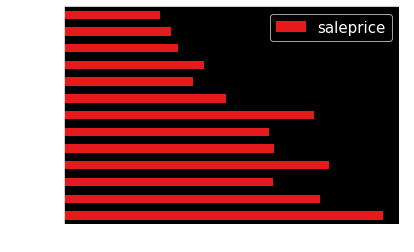

In [39]:
rel_bw_no_of_nothing_and_saleprice.plot(kind = 'barh')

In [ ]:
rel_bw_subclass_saleprice = pd.pivot_table(data = train, index = 'mssubclass', values = 'saleprice')

rel_bw_subclass_saleprice

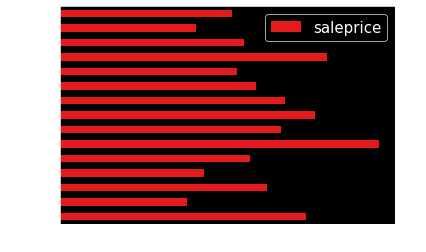

In [38]:
rel_bw_subclass_saleprice.plot(kind = 'barh')#, figsize = (20, 10))

In [40]:
rel_bw_mszoning_saleprice = pd.pivot_table(data = train, index = 'mszoning',
                                           values = 'saleprice').sort_values(by = 'saleprice')
rel_bw_mszoning_saleprice

,saleprice
mszoning,
c (all),74528.000000
rm,126316.830275
rh,131558.375000
rl,191025.433913
fv,214014.061538


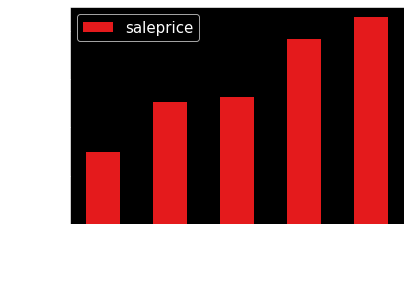

In [41]:
rel_bw_mszoning_saleprice.plot(kind = 'bar')  # figsize = (15, 10))

In [42]:
rel = pd.pivot_table(data = train, index = ['mszoning'],
                                           values = ['saleprice'], columns = 'mssubclass', aggfunc = 'max')
rel

saleprice                                                    \
mssubclass        20        30        40        45        50        60   
mszoning                                                                 
c (all)     55993.0   81000.0  NaN       NaN        108000.0 NaN         
fv          370878.0 NaN       NaN       NaN       NaN        340000.0   
rh          119900.0  79000.0  NaN        76000.0   159434.0 NaN         
rl          611657.0  163500.0  260000.0  135000.0  410000.0  755000.0   
rm          149700.0  153500.0  152000.0  139400.0  256000.0  135000.0   

                                                                        \
mssubclass        70        75        80        85        90       120   
mszoning                                                                 
c (all)     40000.0  NaN       NaN       NaN       NaN       NaN         
fv         NaN       NaN       NaN       NaN       NaN        328900.0   
rh          140000.0 NaN       NaN       NaN        145000.0  181000.0   
rl          359100.0  235000.0  345000.0  198500.0  200000.0  367294.0   
rm          265979.0  475000.0 NaN       NaN        206300.0  392500.0   

                                          
mssubclass       160       180       190  
mszoning                                  
c (all)    NaN       NaN        133900.0  
fv          183900.0 NaN       NaN        
rh         NaN       NaN        200000.0  
rl          239000.0 NaN        228950.0  
rm          151400.0  148000.0  163000.0

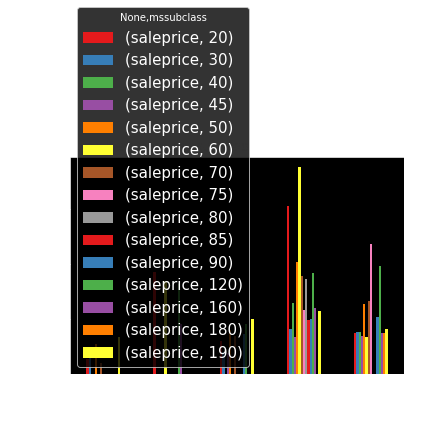

In [46]:
rel.plot(kind = 'bar', title = 'relation between mssubclass, mszonig and saleprice')
#plt.tick_params(axis='both', which='major', labelsize=10)


## Encoding

In [ ]:
import sklearn
from sklearn.preprocessing import OneHotEncoder,  OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
nominal_ix = []
ordinal_ix = []

def get_index(df, columns, list_to_store):
    for col in columns:
        list_to_store.append(df.columns.get_loc(col))

get_index(train, nominalcol, nominal_ix)
get_index(train, ordinalcol, ordinal_ix)
print(nominal_ix)
print('==============')
print(ordinal_ix)
print(len(nominal_ix) + len(ordinal_ix))

[1, 5, 6, 7, 8, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 29, 39, 41, 42, 58, 59, 65, 74, 78, 79, 76]
[2, 9, 15, 16, 17, 18, 27, 28, 30, 31, 32, 33, 35, 40, 53, 55, 57, 60, 63, 64, 72, 73, 47, 48, 49, 50, 51, 52, 54, 56, 61, 77]
60


In [ ]:
t = [('nominal', OneHotEncoder(drop = 'first'), nominal_ix), ('ordinal', OrdinalEncoder(), ordinal_ix)]
col_transform = ColumnTransformer(transformers=t,  remainder = 'passthrough')
col_transform.fit(train)
train = col_transform.transform(train)
test = col_transform.transform(test)

TypeError: ignored